## Prepare the volume fraction points to visit

### Free energy and probability for acceptance

In [665]:
from numpy import log, array, exp

In [1717]:
def FreeEnergyCS(eta, s1, s2, s3, N):
    e0 = eta/s3
    e1 = eta*s1/s3
    e2 = eta*s2/s3
    e3 = eta*s3/s3
    F = ((e2**3.0)/(e0*e3**2.0) - 1.0)*log(1.0 - e3) + (3.0*e1*e2)/(e0*(1.0 - e3)) + (e2**3.0)/(e0*e3*(1.0 - e3)**2.0)
    return N*F

In [1718]:
def ProbCS(eta_cur, eta_new, s1, s2, s3, N):
    return exp(FreeEnergyCS(eta_cur, s1, s2, s3, N) - FreeEnergyCS(eta_new, s1, s2, s3, N))

In [1180]:
ds = array([1.0, 1.4])
n = len(ds)
s1 = sum(ds)/n
s2 = sum(ds**2.0)/n
s3 = sum(ds**3.0)/n

In [1197]:
ds = array(ds)
n = len(ds)
s1 = sum(ds)/n
s2 = sum(ds**2.0)/n
s3 = sum(ds**3.0)/n
FreeEnergyCS(0.6, s1, s2, s3, 1)

7.3956773345473241

In [1189]:
FreeEnergyCS(0.6, s1, s2, s3, 1)

7.8068940549506873

In [670]:
ProbCS(0.56, 0.561, s1, s2, s3, 100)

0.041132312963699652

In [1177]:
FreeEnergyCS(0.580241, s1, s2, s3, 1) - FreeEnergyCS(0.55, s1, s2, s3, 1) 

0.99470903971500224

### Solve for the volume fractions

In [836]:
from scipy.optimize import fsolve, newton_krylov

In [835]:
N = 128
ds = array([1.0, 1.4])
n = len(ds)
s1 = sum(ds)/n
s2 = sum(ds**2.0)/n
s3 = sum(ds**3.0)/n

In [800]:
desired_acceptance = 0.20
eta_current = 0.48
etas = [eta_current]
accuracy = []
while eta_current < 0.65:
    func = lambda eta_0: ProbCS(eta_current, eta_0, s1, s2, s3, N) - desired_acceptance
    eta_new = newton_krylov(func, eta_current, method='lgmres')
    accuracy.append(eta_new-eta_current)
    if abs(ProbCS(eta_current, eta_new, s1, s2, s3, N) - desired_acceptance) < 0.0000001:
        etas.append(float(eta_new))
        eta_current = float(eta_new)
    else:
        raise ValueError('Solver did not find sufficient solution for neighboring volume fractions')
etas = array(etas)
num_etas = len(etas)

In [801]:
num_etas

475

### Write out the volume fractions 

In [837]:
etas_file = open('extended_states.txt', 'w')
etas_file.write(('acceptance = %f\n' % desired_acceptance))
etas_string = 'etas = (%s' % etas[0]
for eta in etas[1:]:
    etas_string = etas_string + ',' + str(eta)
etas_string = etas_string + ')'
etas_file.write(etas_string)

In [838]:
max(trajectory)

0.61160917114449909

### Analyze the results 

In [40]:
import re

In [1229]:
hist = 0.0*etas
trajectory = []

for i in range(68, 136):
    filename = 'C:/Users/rbj428/Documents/research_projects/poly_hs_sim/poly_phase_trans/bin_%i/production__eta_stats.dat' % i
    eta_stats = open(filename, 'r')
    for line in eta_stats:
        try:
            bin_num = int(re.search(r'[^,]+,([0-9]+),[^,]+,[^,]+', line).group(1))
            hist[bin_num] = hist[bin_num] + 1
            trajectory.append(etas[bin_num])
        except:
            print line
            break
hist_s = Smoother(hist, half_window = 6)
hist_s = hist_s/sum(hist_s)
hist = hist/sum(hist)
eta_stats.close()

In [822]:
hist = 0.0*etas
trajectory = []

for i in range(68):
    filename = 'C:/Users/rbj428/Documents/research_projects/binary_hs_sim/trial_2_w_swap_eased/bin_%i/production__eta_stats.dat' % i
    eta_stats = open(filename, 'r')
    for line in eta_stats:
        try:
            bin_num = int(re.search(r'[^,]+,([0-9]+),[^,]+,[^,]+', line).group(1))
            hist[bin_num] = hist[bin_num] + 1
            trajectory.append(etas[bin_num])
        except:
            print line
            break
hist_s = Smoother(hist, half_window = 6)
hist_s = hist_s/sum(hist_s)
hist = hist/sum(hist)
eta_stats.close()

In [602]:
hist = 0.0*etas
trajectory = []

for i in range(68):
    filename = 'C:/Users/rbj428/Documents/research_projects/mono_hs_sim/mono_%i/production__eta_stats.dat' % i
    eta_stats = open(filename, 'r')
    for line in eta_stats:
        try:
            bin_num = int(re.search(r'[^,]+,([0-9]+),[^,]+,[^,]+', line).group(1))
            hist[bin_num] = hist[bin_num] + 1
            trajectory.append(etas[bin_num])
        except:
            print line
            break
hist_s = Smoother(hist, half_window = 6)
hist_s = hist_s/sum(hist_s)
hist = hist/sum(hist)
eta_stats.close()

In [658]:
hist = 0.0*etas
trajectory = []

for i in range(68, 136):
    filename = 'C:/Users/rbj428/Documents/research_projects/poly_hs_sim/poly_2_wo_swap/bin_%i/production__eta_stats.dat' % i
    eta_stats = open(filename, 'r')
    for line in eta_stats:
        try:
            bin_num = int(re.search(r'[^,]+,([0-9]+),[^,]+,[^,]+', line).group(1))
            hist[bin_num] = hist[bin_num] + 1
            trajectory.append(etas[bin_num])
        except:
            print line
            break
hist_s = Smoother(hist, half_window = 6)
hist_s = hist_s/sum(hist_s)
hist = hist/sum(hist)
eta_stats.close()

In [654]:
hist = 0.0*etas
trajectory = []

for i in range(68):
    filename = 'C:/Users/rbj428/Documents/research_projects/poly_hs_sim/poly_2/bin_%i/production__eta_stats.dat' % i
    eta_stats = open(filename, 'r')
    for line in eta_stats:
        try:
            bin_num = int(re.search(r'[^,]+,([0-9]+),[^,]+,[^,]+', line).group(1))
            hist[bin_num] = hist[bin_num] + 1
            trajectory.append(etas[bin_num])
        except:
            print line
            break
hist_s = Smoother(hist, half_window = 6)
hist_s = hist_s/sum(hist_s)
hist = hist/sum(hist)
eta_stats.close()

In [209]:
hist = 0.0*etas
trajectory = []

for i in range(68):
    filename = 'C:/Users/rbj428/Documents/research_projects/poly_hs_sim/poly/bin_%i/production__eta_stats.dat' % i
    eta_stats = open(filename, 'r')
    for line in eta_stats:
        try:
            bin_num = int(re.search(r'[^,]+,([0-9]+),[^,]+,[^,]+', line).group(1))
            hist[bin_num] = hist[bin_num] + 1
            trajectory.append(etas[bin_num])
        except:
            print line
            break
hist_s = Smoother(hist, half_window = 6)
hist_s = hist_s/sum(hist_s)
hist = hist/sum(hist)
eta_stats.close()

In [678]:
hist = 0.0*etas
trajectory = []

for i in range(68):
    filename = 'C:/Users/rbj428/Documents/research_projects/binary_hs_sim/trial_1/bin_%i/production__eta_stats.dat' % i
    eta_stats = open(filename, 'r')
    for line in eta_stats:
        try:
            bin_num = int(re.search(r'[^,]+,([0-9]+),[^,]+,[^,]+', line).group(1))
            hist[bin_num] = hist[bin_num] + 1
            trajectory.append(etas[bin_num])
        except:
            print line
            break
hist_s = Smoother(hist, half_window = 6)
hist_s = hist_s/sum(hist_s)
hist = hist/sum(hist)
eta_stats.close()

In [530]:
hist = 0.0*etas
trajectory = []
trajectory_raw = []

for i in range(68):
    filename = 'C:/Users/rbj428/Documents/research_projects/binary_hs_sim/trial_2_swap/bin_%i/production__eta_stats.dat' % i
    eta_stats = open(filename, 'r')
    for line in eta_stats:
        try:
            search_data = re.search(r'[^,]+,([0-9]+),([0-9\.]+),[^,]+', line)
            bin_num = int(search_data.group(1))
            
            #int(re.search(r'[^,]+,([0-9]+),[^,]+,[^,]+', line).group(1))
            hist[bin_num] = hist[bin_num] + 1
            trajectory.append(etas[bin_num])
            trajectory_raw.append(float(search_data.group(2)))
        except:
            print line
            break
hist_s = Smoother(hist, half_window = 6)
hist_s = hist_s/sum(hist_s)
hist = hist/sum(hist)
eta_stats.close()

In [408]:
hist = 0.0*etas
trajectory = []
trajectory_raw = []

for i in range(68):
    filename = 'C:/Users/rbj428/Documents/research_projects/binary_hs_sim/trial_3/bin_%i/production__eta_stats.dat' % i
    eta_stats = open(filename, 'r')
    for line in eta_stats:
        try:
            search_data = re.search(r'[^,]+,([0-9]+),([0-9\.]+),[^,]+', line)
            bin_num = int(search_data.group(1))
            
            #int(re.search(r'[^,]+,([0-9]+),[^,]+,[^,]+', line).group(1))
            hist[bin_num] = hist[bin_num] + 1
            trajectory.append(etas[bin_num])
            trajectory_raw.append(float(search_data.group(2)))
        except:
            print line
            break
hist_s = Smoother(hist, half_window = 6)
hist_s = hist_s/sum(hist_s)
hist = hist/sum(hist)
eta_stats.close()

In [87]:
def Smoother(hist, half_window = 4):
    hist = array(hist)
    hist_s = 0.0*hist
    for i in range(half_window, len(hist)-half_window):
        hist_s[i] = sum(hist[i-half_window:i+half_window])/float(2*half_window+1)
    hist_s[:half_window] = hist_s[:half_window] + hist_s[half_window]
    return hist_s

In [88]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

In [89]:
from numpy import array, log

### Free energy corrections

In [1231]:
df = -log(array(hist)/hist[0])/float(N)
#df_s = -log(array(hist_s)/hist_s[0])/float(N)  #used this for step 2 update
df_s = Smoother(df, half_window=8) #used this for step 3 update

C:\Users\rbj428\AppData\Local\Continuum\Anaconda2_3\lib\site-packages\ipykernel\__main__.py:15: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


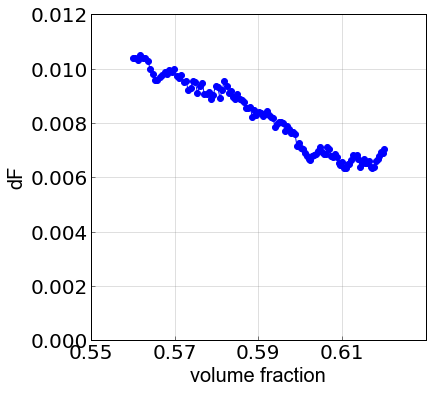

In [1237]:
#things to plot
#plt.plot(etas, df, c="b", linestyle = '-', linewidth = 1, marker='o')
#plt.plot(etas, df_s, c="r", linestyle = '-', linewidth = 1, marker='o')
#plt.plot(etas, df_pred, c="r", linestyle = '-', linewidth = 3)#, marker='o')
#plt.plot(etas, df_optimal, c="g", linestyle = '-', linewidth = 3)#, marker='o')
#plt.plot(etas, df_pred - df_optimal, c="y", linestyle = '-', linewidth = 3)#, marker='o')
#plt.plot(etas_2, 2.0*hist_2, c="g", linestyle = '-', linewidth = 1, marker='o')

plt.plot(etas, hist, c="b", linestyle = '-', linewidth = 1, marker='o')
#plt.plot(etas, hist_s, c="r", linestyle = '-', linewidth = 1, marker='o')

#backround grid details
axes = plt.gca()
axes.grid(b = True, which = 'both', axis = 'both', color = 'gray', linestyle = '-', alpha = 0.5, linewidth = 0.5) 
axes.set_axis_bgcolor('white')  

#font scpecifications
title_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'heavy','size': 20}
axis_label_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'normal','size': 20}

major_ticks = arange(0.55, 0.63, 0.02)  
axes.set_xticks(major_ticks)                                                       

#figure size and tick style
plt.rcParams["figure.figsize"] = [6,6]
plt.rc('axes',edgecolor='black',linewidth=1)
plt.tick_params(which='both', axis='both', color='black', length=4, width=0.5)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#axis range and labels (also specify if log or not)
plt.xlim(0.55, 0.63)
#plt.ylim(0.035, 0.10)
plt.ylim(5, 13)
plt.ylim(0.0, 0.012)
#plt.ylim(-0.002, 0.005)
#plt.yscale('log')
plt.xlabel(r'volume fraction', y=3, fontsize=20, fontdict = axis_label_font)
plt.ylabel(r'dF', fontsize=20, fontdict = axis_label_font)

#title and axis labels
plt.tick_params(axis='both', labelsize=20)
#plt.title('Logistic Regression Fit', y=1.05, fontdict = title_font)

plt.show()

C:\Users\rbj428\AppData\Local\Continuum\Anaconda2_3\lib\site-packages\ipykernel\__main__.py:15: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


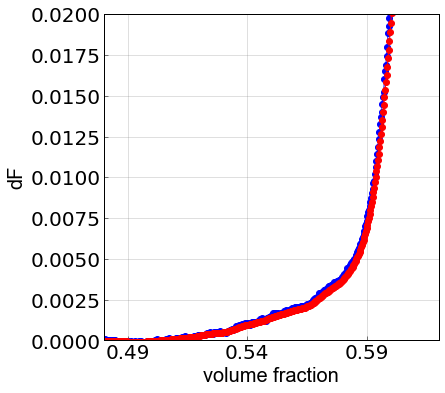

In [832]:
#things to plot
plt.plot(etas, df, c="b", linestyle = '-', linewidth = 1, marker='o')
plt.plot(etas, df_s, c="r", linestyle = '-', linewidth = 1, marker='o')
#plt.plot(etas, df_pred, c="r", linestyle = '-', linewidth = 3)#, marker='o')
#plt.plot(etas, df_optimal, c="g", linestyle = '-', linewidth = 3)#, marker='o')
#plt.plot(etas, df_pred - df_optimal, c="y", linestyle = '-', linewidth = 3)#, marker='o')
#plt.plot(etas_2, 2.0*hist_2, c="g", linestyle = '-', linewidth = 1, marker='o')

#plt.plot(etas, hist, c="b", linestyle = '-', linewidth = 1, marker='o')
#plt.plot(etas, hist_s, c="r", linestyle = '-', linewidth = 1, marker='o')

#backround grid details
axes = plt.gca()
axes.grid(b = True, which = 'both', axis = 'both', color = 'gray', linestyle = '-', alpha = 0.5, linewidth = 0.5) 
axes.set_axis_bgcolor('white')  

#font scpecifications
title_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'heavy','size': 20}
axis_label_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'normal','size': 20}

major_ticks = arange(0.49, 0.65, 0.05)  
axes.set_xticks(major_ticks)                                                       

#figure size and tick style
plt.rcParams["figure.figsize"] = [6,6]
plt.rc('axes',edgecolor='black',linewidth=1)
plt.tick_params(which='both', axis='both', color='black', length=4, width=0.5)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#axis range and labels (also specify if log or not)
plt.xlim(0.48, 0.62)
#plt.ylim(0.035, 0.10)
plt.ylim(5, 13)
plt.ylim(0.0, 0.01)
plt.ylim(0.00001, 0.02)
#plt.yscale('log')
plt.xlabel(r'volume fraction', y=3, fontsize=20, fontdict = axis_label_font)
plt.ylabel(r'dF', fontsize=20, fontdict = axis_label_font)

#title and axis labels
plt.tick_params(axis='both', labelsize=20)
#plt.title('Logistic Regression Fit', y=1.05, fontdict = title_font)

plt.show()

In [815]:
df_optimal = ExpFit(etas, 4.937383325306175e-15, 49.0)

In [780]:
exp(-9.4219408952803789 - 49.0*0.48)

4.937383325306175e-15

In [ ]:
3*

C:\Users\rbj428\AppData\Local\Continuum\Anaconda2_3\lib\site-packages\ipykernel\__main__.py:13: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


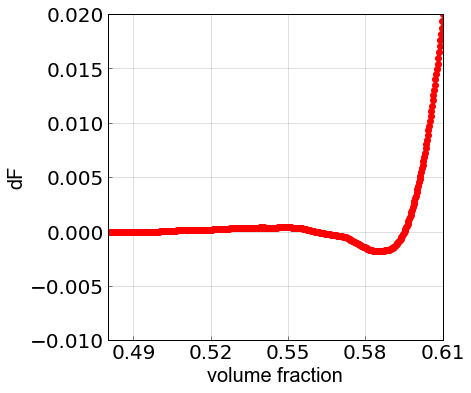

In [74]:
#things to plot
#plt.plot(etas, df, c="b", linestyle = '-', linewidth = 1, marker='o')
plt.plot(etas, df_s, c="r", linestyle = '-', linewidth = 1, marker='o')
#plt.plot(etas, akima_corr_2.__call__(etas), c="g", linestyle = '-', linewidth = 3)#, marker='o')
#plt.plot(etas_2, 2.0*hist_2, c="g", linestyle = '-', linewidth = 1, marker='o')

#plt.plot(etas, hist, c="b", linestyle = '-', linewidth = 1, marker='o')
#plt.plot(etas, hist_s, c="r", linestyle = '-', linewidth = 1, marker='o')

#backround grid details
axes = plt.gca()
axes.grid(b = True, which = 'both', axis = 'both', color = 'gray', linestyle = '-', alpha = 0.5, linewidth = 0.5) 
axes.set_axis_bgcolor('white')  

#font scpecifications
title_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'heavy','size': 20}
axis_label_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'normal','size': 20}

major_ticks = arange(0.49, 0.65, 0.03)  
axes.set_xticks(major_ticks)                                                       

#figure size and tick style
plt.rcParams["figure.figsize"] = [6,6]
plt.rc('axes',edgecolor='black',linewidth=1)
plt.tick_params(which='both', axis='both', color='black', length=4, width=0.5)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#axis range and labels (also specify if log or not)
plt.xlim(0.48, 0.61)
#plt.ylim(0.035, 0.10)
#plt.ylim(5, 13)
#plt.ylim(0.0, 0.06)
plt.ylim(-0.01, 0.1)
plt.ylim(-0.01, 0.02)
#plt.yscale('log')
plt.xlabel(r'volume fraction', y=3, fontsize=20, fontdict = axis_label_font)
plt.ylabel(r'dF', fontsize=20, fontdict = axis_label_font)

#title and axis labels
plt.tick_params(axis='both', labelsize=20)
#plt.title('Logistic Regression Fit', y=1.05, fontdict = title_font)

plt.show()

C:\Users\rbj428\AppData\Local\Continuum\Anaconda2_3\lib\site-packages\ipykernel\__main__.py:13: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


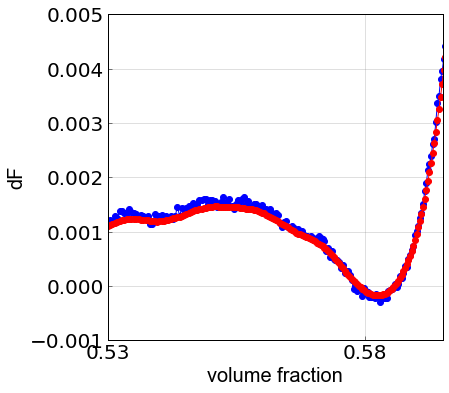

In [548]:
#things to plot
plt.plot(etas, df, c="b", linestyle = '-', linewidth = 1, marker='o')
plt.plot(etas, df_s, c="r", linestyle = '-', linewidth = 1, marker='o')
#plt.plot(etas, akima_corr_2.__call__(etas), c="g", linestyle = '-', linewidth = 3)#, marker='o')
#plt.plot(etas_2, 2.0*hist_2, c="g", linestyle = '-', linewidth = 1, marker='o')

#plt.plot(etas, hist, c="b", linestyle = '-', linewidth = 1, marker='o')
#plt.plot(etas, hist_s, c="r", linestyle = '-', linewidth = 1, marker='o')

#backround grid details
axes = plt.gca()
axes.grid(b = True, which = 'both', axis = 'both', color = 'gray', linestyle = '-', alpha = 0.5, linewidth = 0.5) 
axes.set_axis_bgcolor('white')  

#font scpecifications
title_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'heavy','size': 20}
axis_label_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'normal','size': 20}

major_ticks = arange(0.38, 0.65, 0.05)  
axes.set_xticks(major_ticks)                                                       

#figure size and tick style
plt.rcParams["figure.figsize"] = [6,6]
plt.rc('axes',edgecolor='black',linewidth=1)
plt.tick_params(which='both', axis='both', color='black', length=4, width=0.5)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#axis range and labels (also specify if log or not)
plt.xlim(0.53, 0.595)
#plt.ylim(0.035, 0.10)
#plt.ylim(5, 13)
#plt.ylim(0.0, 0.06)
plt.ylim(-0.01, 0.1)
plt.ylim(-0.001, 0.005)
#plt.yscale('log')
plt.xlabel(r'volume fraction', y=3, fontsize=20, fontdict = axis_label_font)
plt.ylabel(r'dF', fontsize=20, fontdict = axis_label_font)

#title and axis labels
plt.tick_params(axis='both', labelsize=20)
#plt.title('Logistic Regression Fit', y=1.05, fontdict = title_font)

plt.show()

In [542]:
max(trajectory)

0.61717268558420135

In [833]:
(0,1,2)

(0, 1, 2)

In [872]:
exp(-0.012*128)

0.21524034317051757

C:\Users\rbj428\AppData\Local\Continuum\Anaconda2_3\lib\site-packages\ipykernel\__main__.py:13: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


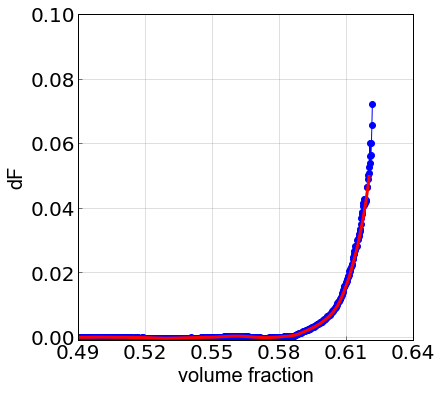

In [418]:
#things to plot
plt.plot(etas, df, c="b", linestyle = '-', linewidth = 1, marker='o')
plt.plot(etas, df_s, c="r", linestyle = '-', linewidth = 3,)# marker='o')
#plt.plot(etas, akima_corr_2.__call__(etas), c="g", linestyle = '-', linewidth = 3)#, marker='o')
#plt.plot(etas_2, 2.0*hist_2, c="g", linestyle = '-', linewidth = 1, marker='o')

#plt.plot(etas, hist, c="b", linestyle = '-', linewidth = 1, marker='o')
#plt.plot(etas, hist_s, c="r", linestyle = '-', linewidth = 1, marker='o')

#backround grid details
axes = plt.gca()
axes.grid(b = True, which = 'both', axis = 'both', color = 'gray', linestyle = '-', alpha = 0.5, linewidth = 0.5) 
axes.set_axis_bgcolor('white')  

#font scpecifications
title_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'heavy','size': 20}
axis_label_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'normal','size': 20}

major_ticks = arange(0.49, 0.65, 0.03)  
axes.set_xticks(major_ticks)                                                       

#figure size and tick style
plt.rcParams["figure.figsize"] = [6,6]
plt.rc('axes',edgecolor='black',linewidth=1)
plt.tick_params(which='both', axis='both', color='black', length=4, width=0.5)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#axis range and labels (also specify if log or not)
plt.xlim(0.49, 0.64)
#plt.ylim(0.035, 0.10)
#plt.ylim(5, 13)
#plt.ylim(0.0, 0.06)
plt.ylim(-0.02, 0.04)
plt.ylim(-0.001, 0.1)
#plt.ylim(-0.01, 0.06)
#plt.yscale('log')
plt.xlabel(r'volume fraction', y=3, fontsize=20, fontdict = axis_label_font)
plt.ylabel(r'dF', fontsize=20, fontdict = axis_label_font)

#title and axis labels
plt.tick_params(axis='both', labelsize=20)
#plt.title('Logistic Regression Fit', y=1.05, fontdict = title_font)

plt.show()

In [218]:
etas_temp = etas
df_temp = df

In [377]:
exp(-0.05*128)

0.0016615572731739339

In [ ]:
exp(-9.4219408952803789 - z*eta) = ln(A) + z*eta

In [ ]:
exp(-9.4219408952803789 - z*eta)

## Fit the data

### First fit

In [681]:
from numpy import isnan, isinf
from scipy.optimize import curve_fit

In [812]:
def ExpFit(eta, A, z):
    return A*exp(z*(eta))

In [683]:
for i in range(len(df)):
    if isinf(df[i]):
        first_inf = i
        break

for i in range(len(df_s)):
    if isinf(df_s[i]):
        first_inf_s = i
        break

In [684]:
df_clean = df[:first_inf]
df_clean_s = df_s[:first_inf_s]

In [685]:
popt, pcov = curve_fit(ExpFit, etas[:first_inf], df_clean)

In [686]:
popt

array([  8.44025263e-16,   5.26800174e+01])

In [687]:
ExpFit(0.62, popt[0], popt[1])

0.12915546317137222

In [813]:
df_pred = ExpFit(etas, 8.44025263e-16, 5.26800174e+01)

In [695]:
df_optimal = ExpFit(etas, 8.44025263e-16, 5.26800174e+01)

In [737]:
log(ExpFit(0.48, 8.44025263e-16, 5.26800174e+01))

-9.4219408952803789

In [ ]:
ExpFit(etas, 4.937383325306175e-15, 49.0)

In [1054]:
def FreeEnergyBinWithCorr1(eta, N):
    ds = array([1.0, 1.4])
    n = len(ds)
    s1 = sum(ds)/n
    s2 = sum(ds**2.0)/n
    s3 = sum(ds**3.0)/n
    
    #F = FreeEnergyCS(eta, s1, s2, s3, N) + N*ExpFit(eta, 8.44025263e-16, 5.26800174e+01)
    F = FreeEnergyCS(eta, s1, s2, s3, N) + N*ExpFit(eta, 8.44025263e-16, 5.26800174e+01) + (0.0 + ((2.0)/(0.62-0.55))*(eta-0.55))
    #F = FreeEnergyCS(eta, s1, s2, s3, N) + N*ExpFit(eta, 8.44025263e-16, 5.26800174e+01) + N*(0.0 + ((2.3)/(0.62-0.48))*(eta-0.48))
    #F = FreeEnergyCS(eta, s1, s2, s3, N) + N*ExpFit(eta, 8.44025263e-16, 5.26800174e+01) + N*(0.0 + ((2.5)/(0.62-0.48))*(eta-0.48))
    #F = FreeEnergyCS(eta, s1, s2, s3, N) + N*ExpFit(eta, 8.44025263e-16, 5.26800174e+01) + N*(0.0 + ((10.0)/(0.62-0.48))*(eta-0.48))
    #F = FreeEnergyCS(eta, s1, s2, s3, N) + N*ExpFit(eta, 8.44025263e-16, 5.26800174e+01) + N*(0.0 + ((100.0)/(0.62-0.48))*(eta-0.48))
    #F = FreeEnergyCS(eta, s1, s2, s3, N) + N*ExpFit(eta, 4.937383325306175e-15, 49.0)
    return F

In [1055]:
def ProbBinWithCorr1(eta_cur, eta_new, N):
    return exp(FreeEnergyBinWithCorr1(eta_cur, N) - FreeEnergyBinWithCorr1(eta_new, N))

In [1053]:
ProbBinWithCorr1(0.61, 0.611, 128)

0.0020679554830569432

In [1050]:
ProbBinWithCorr1(0.61, 0.611, 128)

0.0020097071225393683

In [1007]:
from numpy import arange

In [788]:
F_CS = []
F_updated = []
for eta in arange(0.001, 0.66, 0.001):
    F_CS.append(FreeEnergyCS(eta, s1, s2, s3, 1))
    F_updated.append(FreeEnergyBinWithCorr1(eta, 1))

C:\Users\rbj428\AppData\Local\Continuum\Anaconda2_3\lib\site-packages\ipykernel\__main__.py:11: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


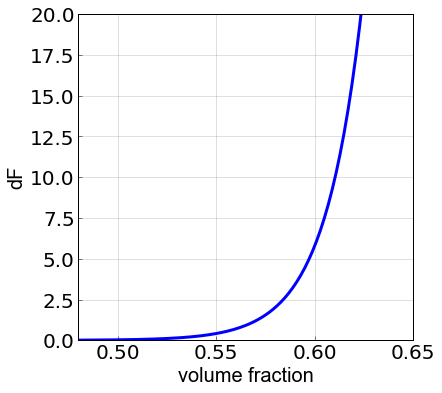

In [531]:
#things to plot
plt.plot(arange(0.001, 0.66, 0.001), N*array(F_updated) - N*array(F_CS), c="b", linestyle = '-', linewidth = 3)#, marker='o')
#plt.plot(arange(0.001, 0.66, 0.001), F_updated, c="r", linestyle = '-', linewidth = 3)#, marker='o')

#plt.plot(etas, hist, c="b", linestyle = '-', linewidth = 1, marker='o')
#plt.plot(etas, hist_s, c="r", linestyle = '-', linewidth = 1, marker='o')

#backround grid details
axes = plt.gca()
axes.grid(b = True, which = 'both', axis = 'both', color = 'gray', linestyle = '-', alpha = 0.5, linewidth = 0.5) 
axes.set_axis_bgcolor('white')  

#font scpecifications
title_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'heavy','size': 20}
axis_label_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'normal','size': 20}

#major_ticks = arange(0.49, 0.65, 0.05)  
#axes.set_xticks(major_ticks)                                                       

#figure size and tick style
plt.rcParams["figure.figsize"] = [6,6]
plt.rc('axes',edgecolor='black',linewidth=1)
plt.tick_params(which='both', axis='both', color='black', length=4, width=0.5)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#axis range and labels (also specify if log or not)
plt.xlim(0.48, 0.65)

#plt.ylim(0, 0.125)
plt.ylim(0,20)

#plt.yscale('log')
plt.xlabel(r'volume fraction', y=3, fontsize=20, fontdict = axis_label_font)
plt.ylabel(r'dF', fontsize=20, fontdict = axis_label_font)

#title and axis labels
plt.tick_params(axis='both', labelsize=20)
#plt.title('Logistic Regression Fit', y=1.05, fontdict = title_font)

plt.show()

In [105]:
5.0/128

0.0390625

In [1056]:
desired_acceptance = 0.10
eta_current = 0.55
etas = [eta_current]
accuracy = []
while eta_current < 0.62: #0.65
    func = lambda eta_0: ProbBinWithCorr1(eta_current, eta_0, N) - desired_acceptance
    eta_new = newton_krylov(func, eta_current, method='lgmres')
    accuracy.append(eta_new-eta_current)
    if abs(ProbBinWithCorr1(eta_current, eta_new, N) - desired_acceptance) < 0.000001:
        etas.append(float(eta_new))
        eta_current = float(eta_new)
    else:
        raise ValueError('Solver did not find sufficient solution for neighboring volume fractions')
etas = array(etas)
num_etas = len(etas)

In [1057]:
len(etas)

156

In [1041]:
len(etas)

155

In [965]:
set([1,2,3,4,5,6,0,0,0,0,0])-set([0,4])

{1, 2, 3, 5, 6}

In [1138]:
start = 0.14
slope = (0.07-0.14)/(0.58-0.48)
dr_max_gen = lambda x: 0.14 + slope*(x - 0.48)
dr_maxs = array([dr_max_gen(x) for x in etas])

In [1058]:
etas_file = open('extended_states_corr1.txt', 'w')
etas_file.write(('acceptance = %f\n' % desired_acceptance))

#generate etas
etas_string = 'etas = (%s' % etas[0]
for eta in etas[1:]:
    etas_string = etas_string + ',' + str(eta)
etas_string = etas_string + ')\n'
etas_file.write(etas_string)

#generate dr_max values
dr_maxs_string = 'dr_maxs = (%s' % dr_maxs[0]
for dr_max in dr_maxs[1:]:
    dr_maxs_string = dr_maxs_string + ',' + str(dr_max)
dr_maxs_string = dr_maxs_string + ')'
etas_file.write(dr_maxs_string)

etas_file.close()

In [528]:
etas[-1]

0.6500745403360052

In [867]:
dr_maxs

array([ 0.16      ,  0.15950795,  0.15901744,  0.15852845,  0.15804098,
        0.15755503,  0.15707058,  0.15658764,  0.15610618,  0.15562621,
        0.15514771,  0.15467068,  0.15419512,  0.15372101,  0.15324835,
        0.15277713,  0.15230735,  0.151839  ,  0.15137206,  0.15090654,
        0.15044243,  0.14997972,  0.14951841,  0.14905848,  0.14859994,
        0.14814277,  0.14768697,  0.14723253,  0.14677945,  0.14632772,
        0.14587733,  0.14542828,  0.14498056,  0.14453417,  0.14408909,
        0.14364533,  0.14320288,  0.14276172,  0.14232187,  0.1418833 ,
        0.14144601,  0.14101   ,  0.14057527,  0.1401418 ,  0.13970959,
        0.13927864,  0.13884893,  0.13842047,  0.13799325,  0.13756726,
        0.1371425 ,  0.13671896,  0.13629664,  0.13587552,  0.13545562,
        0.13503691,  0.1346194 ,  0.13420308,  0.13378794,  0.13337399,
        0.13296121,  0.1325496 ,  0.13213915,  0.13172986,  0.13132173,
        0.13091475,  0.13050891,  0.13010422,  0.12970065,  0.12

### Second fit

In [74]:
from scipy.interpolate import Akima1DInterpolator

In [97]:
#find the index of eta=0.61 for max fit
for i in range(len(etas)):
    if etas[i] > 0.615:
        index_eta_615 = i
        break

In [98]:
df_clean_s[index_eta_615]

0.036727302299372495

In [45]:
akima_step_2 = Akima1DInterpolator(etas[:index_eta_615+1], df_clean_s[:index_eta_615+1])

In [46]:
akima_step_2.__call__(0.615, extrapolate=True)

array(0.03669655046021158)

In [393]:
from numpy import cumsum, zeros, array, nan_to_num

In [394]:
class AkimaModified:
    def __init__(self, x, y):
        self.akima = Akima1DInterpolator(x, y)
        self.x0, self.x1 = x[-2], x[-1]
        self.f0, self.f1 = y[-2], y[-1]
        
    def __call__(self, x):
        f = self.akima.__call__(x)
        f = nan_to_num(f)
        m = (self.f1 - self.f0)/(self.x1 - self.x0)
        f = f + (x > self.x1)*(m*(x - self.x1) + self.f1)
        return f

In [100]:
akima_corr_2 = AkimaModified(etas[:index_eta_615+1], df_clean_s[:index_eta_615+1])

In [103]:
akima_corr_2.__call__(0.61)

0.020389446853090628

In [113]:
def FreeEnergyBinWithCorr2(eta, N):   
    F = FreeEnergyBinWithCorr1(eta, N) + float(N)*akima_corr_2(eta)
    return F

In [114]:
def ProbBinWithCorr2(eta_cur, eta_new, N):
    return exp(FreeEnergyBinWithCorr2(eta_cur, N) - FreeEnergyBinWithCorr2(eta_new, N))

In [115]:
FreeEnergyBinWithCorr2(0.62,128)

1136.2113455379033

In [116]:
FreeEnergyBinWithCorr1(0.62,128)

1128.6118859365333

In [136]:
ProbBinWithCorr1(0.60, 0.6001, 128)

0.57307653080936993

In [137]:
ProbBinWithCorr2(0.60, 0.6001, 128)

0.56532756802509876

In [138]:
ProbCS(0.60, 0.6001, s1, s2, s3, 128)

0.5907931598961802

In [426]:
ProbBinWithCorr3(0.60, 0.6001, 128)

0.56144719065031945

In [407]:
desired_acceptance = 0.20
eta_current = 0.48
etas = [eta_current]
accuracy = []
while eta_current < 0.65:
    func = lambda eta_0: ProbBinWithCorr2(eta_current, eta_0, N) - desired_acceptance
    eta_new = newton_krylov(func, eta_current, method='lgmres')
    accuracy.append(eta_new-eta_current)
    if abs(ProbBinWithCorr2(eta_current, eta_new, N) - desired_acceptance) < 0.000001:
        etas.append(float(eta_new))
        eta_current = float(eta_new)
    else:
        raise ValueError('Solver did not find sufficient solution for neighboring volume fractions')
etas = array(etas)
num_etas = len(etas)

In [328]:
etas_file = open('extended_states_corr2.txt', 'w')
etas_file.write(('acceptance = %f\n' % desired_acceptance))
etas_string = 'etas = (%s' % etas[0]
for eta in etas[1:]:
    etas_string = etas_string + ',' + str(eta)
etas_string = etas_string + ')'
etas_file.write(etas_string)
etas_file.close()

In [384]:
len(etas)

540

### Third fit

In [414]:
from scipy.interpolate import Akima1DInterpolator

In [415]:
#find the index of eta=0.61 for max fit
for i in range(len(etas)):
    if etas[i] > 0.62:
        index_eta_62 = i
        break

In [416]:
etas[index_eta_62]

0.62010318290461064

In [419]:
akima_corr_3 = AkimaModified(etas[:index_eta_62+1], df_s[:index_eta_62+1])

In [420]:
akima_corr_3.__call__(0.61)

0.015792031859513871

In [421]:
def FreeEnergyBinWithCorr3(eta, N):   
    F = FreeEnergyBinWithCorr2(eta, N) + float(N)*akima_corr_3(eta)
    return F

In [422]:
def ProbBinWithCorr3(eta_cur, eta_new, N):
    return exp(FreeEnergyBinWithCorr3(eta_cur, N) - FreeEnergyBinWithCorr3(eta_new, N))

In [423]:
desired_acceptance = 0.20
eta_current = 0.48
etas = [eta_current]
accuracy = []
while eta_current < 0.65:
    func = lambda eta_0: ProbBinWithCorr3(eta_current, eta_0, N) - desired_acceptance
    eta_new = newton_krylov(func, eta_current, method='lgmres')
    accuracy.append(eta_new-eta_current)
    if abs(ProbBinWithCorr3(eta_current, eta_new, N) - desired_acceptance) < 0.000001:
        etas.append(float(eta_new))
        eta_current = float(eta_new)
    else:
        raise ValueError('Solver did not find sufficient solution for neighboring volume fractions')
etas = array(etas)
num_etas = len(etas)

In [424]:
len(etas)

559

(0.55, 0.68)

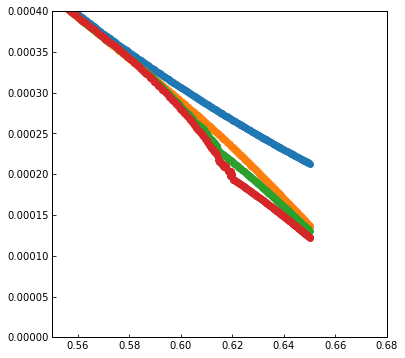

In [428]:
#etas_2, accuracy_2 = etas, accuracy
plt.scatter(etas_0[1:], accuracy_0)
plt.scatter(etas_1[1:], accuracy_1)
plt.scatter(etas_2[1:], accuracy_2)
plt.scatter(etas[1:], accuracy)
plt.ylim(0.0000, 0.0004)
plt.xlim(0.55, 0.68)

(0.47, 0.669)

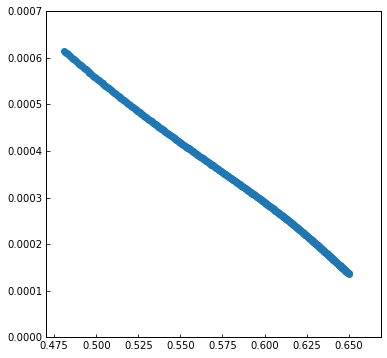

In [182]:
plt.scatter(etas[1:], accuracy)
plt.ylim(0, 0.0007)
plt.xlim(0.47, 0.669)

In [123]:
etas

array([ 0.48      ,  0.48061506,  0.4812282 ,  0.48183944,  0.48244877,
        0.48305621,  0.48366177,  0.48426581,  0.48486791,  0.48546714,
        0.48606476,  0.48666108,  0.4872547 ,  0.4878466 ,  0.48843681,
        0.48902547,  0.48961269,  0.49019779,  0.49078107,  0.49136286,
        0.49194266,  0.49252152,  0.49309861,  0.49367335,  0.49424698,
        0.49481902,  0.49538899,  0.49595727,  0.49652296,  0.49708738,
        0.49765055,  0.49821156,  0.49877133,  0.499329  ,  0.49988502,
        0.50043944,  0.50099215,  0.50154283,  0.50209237,  0.50263974,
        0.5031867 ,  0.50373132,  0.50427401,  0.50481559,  0.50535521,
        0.50589405,  0.50643089,  0.5069662 ,  0.5075    ,  0.50803237,
        0.50856333,  0.5090931 ,  0.50962099,  0.51014756,  0.51067289,
        0.51119623,  0.51171825,  0.51223835,  0.51275732,  0.51327473,
        0.51379065,  0.51430509,  0.51481798,  0.51532946,  0.51583896,
        0.51634748,  0.51685422,  0.51735985,  0.51786378,  0.51

In [279]:
num_etas

540

In [71]:
etas

array([ 0.48      ,  0.48061506,  0.4812282 ,  0.48183944,  0.48244877,
        0.48305621,  0.48366177,  0.48426581,  0.48486791,  0.48546714,
        0.48606476,  0.48666108,  0.4872547 ,  0.4878466 ,  0.48843681,
        0.48902547,  0.48961269,  0.49019779,  0.49078107,  0.49136286,
        0.49194266,  0.49252152,  0.49309861,  0.49367335,  0.49424698,
        0.49481902,  0.49538899,  0.49595727,  0.49652296,  0.49708738,
        0.49765055,  0.49821156,  0.49877133,  0.499329  ,  0.49988502,
        0.50043944,  0.50099215,  0.50154283,  0.50209237,  0.50263974,
        0.5031867 ,  0.50373132,  0.50427401,  0.50481559,  0.50535521,
        0.50589405,  0.50643089,  0.5069662 ,  0.5075    ,  0.50803237,
        0.50856333,  0.5090931 ,  0.50962099,  0.51014756,  0.51067289,
        0.51119623,  0.51171825,  0.51223835,  0.51275732,  0.51327473,
        0.51379065,  0.51430509,  0.51481798,  0.51532946,  0.51583896,
        0.51634748,  0.51685422,  0.51735985,  0.51786378,  0.51

In [336]:
len(etas)

540

In [ ]:
major_ticks = np.arange(0.49, 0.62, 0.02)                                              
minor_ticks = np.arange(0, 101, 5) 

(0.48, 0.62)

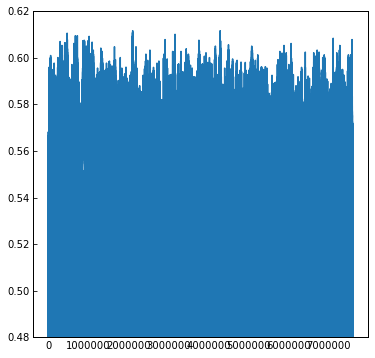

In [827]:
plt.plot(range(len(trajectory)), trajectory)
plt.ylim(0.48, 0.62)
#plt.xlim(2.12e5, 2.121e6)
#plt.xscale('log')

In [434]:
max(trajectory)

0.6610354452496926

(0.55, 0.65)

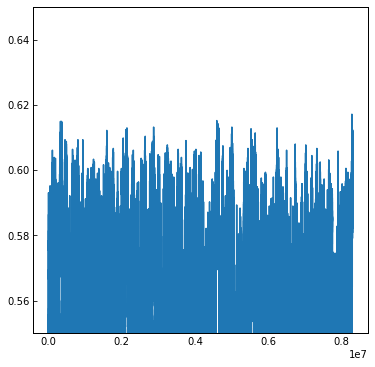

In [610]:
plt.plot(range(len(trajectory_raw)), trajectory_raw)
plt.ylim(0.55, 0.65)
#plt.xlim(2.12e5, 2.121e6)
#plt.xscale('log')

In [306]:
trajectory_raw[10000:]

[0.566224,
 0.569569,
 0.570302,
 0.569936,
 0.569201,
 0.571031,
 0.571757,
 0.571394,
 0.572479,
 0.571031,
 0.573197,
 0.573555,
 0.573197,
 0.573912,
 0.571394,
 0.572118,
 0.570302,
 0.571031,
 0.570302,
 0.569936,
 0.569201,
 0.569201,
 0.569569,
 0.569201,
 0.56772,
 0.56772,
 0.565848,
 0.565848,
 0.565092,
 0.563951,
 0.564333,
 0.562417,
 0.562031,
 0.562417,
 0.56547,
 0.56547,
 0.562802,
 0.565848,
 0.565848,
 0.565848,
 0.565848,
 0.566599,
 0.566974,
 0.56772,
 0.568462,
 0.56772,
 0.56772,
 0.56772,
 0.568462,
 0.568092,
 0.568462,
 0.570302,
 0.570667,
 0.571031,
 0.571757,
 0.568832,
 0.568462,
 0.56772,
 0.568092,
 0.567347,
 0.568462,
 0.566224,
 0.567347,
 0.568092,
 0.565848,
 0.566224,
 0.564713,
 0.564333,
 0.564713,
 0.565092,
 0.566224,
 0.566599,
 0.564713,
 0.563951,
 0.563569,
 0.564333,
 0.565092,
 0.564333,
 0.564713,
 0.565092,
 0.564333,
 0.565092,
 0.562417,
 0.563951,
 0.566224,
 0.56772,
 0.567347,
 0.568092,
 0.56772,
 0.566974,
 0.566599,
 0.565848,

In [1741]:
from itertools import combinations

In [1742]:
from scipy.optimize import fsolve, newton_krylov

In [2000]:
def CPD(d_min, d_max, d):
    A = (2.0*(d_max**2.0)*(d_min**2.0))/(d_max**2.0 - d_min**2.0)
    return (1.0/2.0)*A*(1.0/(d_min**2.0) - 1.0/(d**2.0))

In [2034]:
N=128 #128
d_min = 1.0
#d_max = d_min/0.4492
#d_max = d_min/0.35
d_max = d_min/0.52
#d_max = d_min/0.2

ds = []

#first point
total_prob = (1.0/float(N))/2.0
func = lambda d: CPD(d_min, d_max, d) - total_prob
d_new = newton_krylov(func, d_min, method='lgmres')
ds = [float(d_new)]

#rest of the points
for i in range(1,N):
    total_prob = (1.0/float(N))/2.0 + float(i)*(1.0/float(N))
    func = lambda d: (CPD(d_min, d_max, d) - total_prob)**2.0
    d_new = newton_krylov(func, d_new, method='lgmres')
    if abs(func(d_new)) < 0.00001:
        ds.append(float(d_new))
    else:
        raise ValueError('Solver did not find sufficient solution for neighboring volume fractions')

In [1874]:
len(ds)

128

In [2002]:
letter_combos = combinations('ABCDEFGHIJKLMNOPQRSTUVWXYZ', 3)
system_stats = ""
for d in ds:
    atom = ''.join(next(letter_combos))
    system_stats = system_stats + ("(%s,%f,%i) " % (atom,d,1))

In [2035]:
system_stats

'(ABC,1.001718,1) (ABD,1.004309,1) (ABE,1.007577,1) (ABF,1.011630,1) (ABG,1.014741,1) (ABH,1.018813,1) (ABI,1.021984,1) (ABJ,1.026142,1) (ABK,1.029381,1) (ABL,1.033630,1) (ABM,1.036941,1) (ABN,1.041285,1) (ABO,1.044670,1) (ABP,1.049112,1) (ABQ,1.052574,1) (ABR,1.057119,1) (ABS,1.060661,1) (ABT,1.065311,1) (ABU,1.068937,1) (ABV,1.073698,1) (ABW,1.077410,1) (ABX,1.082285,1) (ABY,1.086088,1) (ABZ,1.091082,1) (ACD,1.094978,1) (ACE,1.100097,1) (ACF,1.104091,1) (ACG,1.109339,1) (ACH,1.113435,1) (ACI,1.118818,1) (ACJ,1.123020,1) (ACK,1.128544,1) (ACL,1.132857,1) (ACM,1.138529,1) (ACN,1.142957,1) (ACO,1.148783,1) (ACP,1.153333,1) (ACQ,1.159319,1) (ACR,1.163996,1) (ACS,1.170151,1) (ACT,1.174960,1) (ACU,1.181292,1) (ACV,1.186240,1) (ACW,1.192757,1) (ACX,1.197852,1) (ACY,1.204563,1) (ACZ,1.209811,1) (ADE,1.216727,1) (ADF,1.222136,1) (ADG,1.229266,1) (ADH,1.234845,1) (ADI,1.242202,1) (ADJ,1.247959,1) (ADK,1.255554,1) (ADL,1.261500,1) (ADM,1.269347,1) (ADN,1.275492,1) (ADO,1.283604,1) (ADP,1.289959

In [2036]:
print ds

[1.0014280531756807, 1.003579331461546, 1.0062890304581387, 1.0096422463166561, 1.012211829574048, 1.015568461824309, 1.0181775248480476, 1.021592247152557, 1.0242479213910127, 1.0277242485581737, 1.0304281371876467, 1.0339680031165044, 1.0367215893543364, 1.040326955359776, 1.043131780671561, 1.0468046919764638, 1.0496623654204442, 1.0534049577511815, 1.0563171600123709, 1.0601316648196915, 1.0631001523913546, 1.0669889024722015, 1.0700155120465011, 1.0739809475295155, 1.0770676008760924, 1.0811122756772877, 1.0842609846673654, 1.0883875733730382, 1.0916004455403172, 1.095811750859358, 1.0990909953651233, 1.1033899561077491, 1.1067378900389249, 1.1111275897431847, 1.11454664507224, 1.1190303212983201, 1.1225230522280474, 1.1271041066506766, 1.1306731977145055, 1.1353552068480874, 1.1390034815308616, 1.1437902085687792, 1.1475206386894286, 1.1524160462041826, 1.156231762134903, 1.1612400258079616, 1.1651443274926665, 1.1702698510894143, 1.1742662200278495, 1.1795136517503368, 1.1836057

In [1168]:
ProbCS(0.01, 0.02, s1, s2, s3, 128)

0.0073099423644477314

In [1172]:
log(0.1)

-2.3025850929940455

In [1614]:
start = 0.14
slope = (0.08-0.16)/(0.58-0.48)
dr_max_gen = lambda x: 0.14 + slope*(x - 0.48)
dr_maxs = array([dr_max_gen(x) for x in etas])

In [1159]:
slope = (0.07-0.14)/(0.58-0.48)
dr_max_gen = lambda x: 0.12 + slope*(x - 0.56)
dr_maxs = array([dr_max_gen(x) for x in etas])

In [1160]:
from scipy.optimize import fsolve, newton_krylov

In [1611]:
ds = array(ds)
n = len(ds)
s1 = sum(ds)/n
s2 = sum(ds**2.0)/n
s3 = sum(ds**3.0)/n

In [1612]:
desired_acceptance = 0.10
eta_current = 0.55
etas = [eta_current]
while eta_current < 0.67:
    func = lambda eta_0: ProbCS(eta_current, eta_0, s1, s2, s3, N) - desired_acceptance
    eta_new = newton_krylov(func, eta_current, method='lgmres')
    if abs(ProbCS(eta_current, eta_new, s1, s2, s3, N) - desired_acceptance) < 0.000001:
        etas.append(float(eta_new))
        eta_current = float(eta_new)
    else:
        raise ValueError('Solver did not find sufficient solution for neighboring volume fractions')
etas = array(etas)
num_etas = len(etas)

In [1615]:
etas_file = open('extended_states.txt', 'w')
etas_file.write(('acceptance = %f\n' % desired_acceptance))
etas_string = 'etas = (%s' % etas[0]
for eta in etas[1:]:
    etas_string = etas_string + ',' + str(eta)
etas_string = etas_string + ')\n'
etas_file.write(etas_string)



#generate dr_max values
dr_maxs_string = 'dr_maxs = (%s' % dr_maxs[0]
for dr_max in dr_maxs[1:]:
    dr_maxs_string = dr_maxs_string + ',' + str(dr_max)
dr_maxs_string = dr_maxs_string + ')'
etas_file.write(dr_maxs_string)



etas_file.close()

In [634]:
etas[1]

0.48065109967158476

In [1077]:
len(etas)

327

In [109]:
def Smoother(hist, half_window = 5):
    hist = array(hist)
    hist_s = 0.0*hist
    for i in range(half_window, len(hist)-half_window):
        hist_s[i] = sum(hist[i-half_window:i+half_window])/float(2*half_window+1)
    return hist_s

In [110]:
Smoother(hist)

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   5.69856699e-03,
         5.72895976e-03,   5.74932446e-03,   5.78773968e-03,
         5.82499782e-03,   5.87367253e-03,   5.88570622e-03,
         5.89203162e-03,   5.91285915e-03,   5.90838509e-03,
         5.90198255e-03,   5.89689138e-03,   5.88478055e-03,
         5.85616198e-03,   5.83533445e-03,   5.79900198e-03,
         5.78511695e-03,   5.76575506e-03,   5.74778168e-03,
         5.73335668e-03,   5.72587420e-03,   5.71600040e-03,
         5.69239587e-03,   5.67287970e-03,   5.65089508e-03,
         5.64372115e-03,   5.62759910e-03,   5.59219230e-03,
         5.56951343e-03,   5.55531985e-03,   5.51983591e-03,
         5.50070544e-03,   5.50872789e-03,   5.48782322e-03,
         5.48473766e-03,   5.48157496e-03,   5.47602095e-03,
         5.47671521e-03,   5.46576147e-03,   5.45557912e-03,
         5.46923272e-03,   5.46776708e-03,   5.46969556e-03,
         5.48651186e-03,

In [268]:
max(trajectory)

0.62180140514755855

In [203]:
0.4/7*100

5.714285714285714

In [72]:
trajectory_raw

[0.583547,
 0.583214,
 0.582881,
 0.582881,
 0.582881,
 0.583879,
 0.582547,
 0.581876,
 0.582547,
 0.581876,
 0.581539,
 0.581539,
 0.581202,
 0.580184,
 0.579501,
 0.580524,
 0.579843,
 0.580524,
 0.581539,
 0.581202,
 0.581539,
 0.581876,
 0.582212,
 0.582212,
 0.582547,
 0.582547,
 0.584209,
 0.584209,
 0.583879,
 0.583547,
 0.583214,
 0.582547,
 0.583879,
 0.583879,
 0.584209,
 0.584539,
 0.584868,
 0.585197,
 0.586176,
 0.587148,
 0.587471,
 0.587471,
 0.586501,
 0.586501,
 0.587471,
 0.587792,
 0.588433,
 0.588433,
 0.587148,
 0.584539,
 0.585197,
 0.584539,
 0.583547,
 0.583547,
 0.583214,
 0.582212,
 0.582547,
 0.582212,
 0.581876,
 0.581539,
 0.581539,
 0.580524,
 0.581539,
 0.582881,
 0.582881,
 0.583879,
 0.583214,
 0.582881,
 0.581539,
 0.581539,
 0.582547,
 0.582212,
 0.582547,
 0.582881,
 0.582881,
 0.583547,
 0.582881,
 0.584209,
 0.583879,
 0.584209,
 0.584209,
 0.583879,
 0.583547,
 0.584539,
 0.583879,
 0.583547,
 0.583879,
 0.583547,
 0.585197,
 0.584539,
 0.584209,

In [430]:
def Diff(eta):
    return FreeEnergyBinWithCorr3(eta, 1) - FreeEnergyCS(eta, s1, s2, s3, 1)

In [431]:
diff = []
for eta in etas:
    diff.append(Diff(eta))

In [433]:
diff

[-2.2099658743002237e-05,
 -1.9434501725257292e-05,
 -1.6690305425726137e-05,
 -1.3864995127121915e-05,
 -1.095644911242033e-05,
 -7.9624977873393732e-06,
 -4.880922783279118e-06,
 -9.0592206198891745e-06,
 -1.1747905463543873e-05,
 1.2942698450757462e-06,
 1.0180733854170398e-05,
 1.0679605733976416e-05,
 2.9201874490958346e-05,
 5.6465567642938197e-05,
 7.9569009577618033e-05,
 9.528616199361295e-05,
 0.00010270853147797965,
 0.00011441468093220664,
 0.00013398206192594131,
 0.00014249809146793524,
 0.00016344121963118852,
 0.00016549285821909621,
 0.00016887678468879841,
 0.00018961747442602928,
 0.00019399357470817336,
 0.0001942081060244405,
 0.00020238062016897373,
 0.00021056655381546108,
 0.00023651374267252834,
 0.00024623837342652166,
 0.00025291373626767921,
 0.00026575946050932941,
 0.00027455882490823313,
 0.00028987921915746284,
 0.00030400510386741075,
 0.0003189001713987949,
 0.00032261475558659214,
 0.00034465485465862145,
 0.00035542582182834792,
 0.000374921437384045

(0.0001, 0.2)

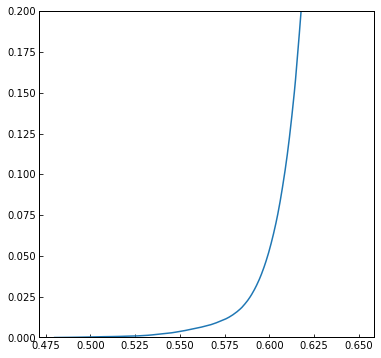

In [443]:
plt.plot(etas, diff)
plt.ylim(0.0001, 0.2)
#plt.yscale('log')

In [21]:
from numpy import sqrt

In [1968]:
sqrt(( sum(ds**2.0)/len(ds) - (sum(ds)/len(ds))**2.0 ))/((sum(ds)/len(ds)))

0.22898716572151359

In [24]:
sum(ds**2.0)/len(ds) 

1.998121414369709

In [26]:
(sum(ds)/len(ds))**2.0

1.898569681377448

In [120]:
### First correction

C:\Users\rbj428\AppData\Local\Continuum\Anaconda2_3\lib\site-packages\ipykernel\__main__.py:13: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


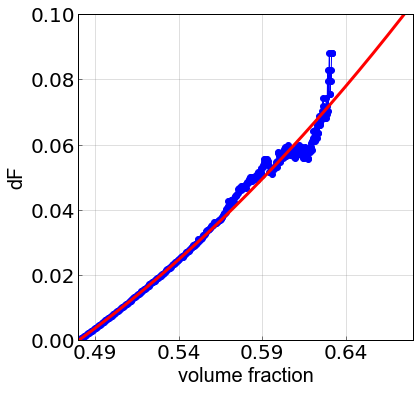

In [317]:
#things to plot
plt.plot(etas, df, c="b", linestyle = '-', linewidth = 1, marker='o')
#plt.plot(etas, df_s, c="r", linestyle = '-', linewidth = 1, marker='o')
plt.plot(etas, df_pred, c="r", linestyle = '-', linewidth = 3)#, marker='o')
#plt.plot(etas_2, 2.0*hist_2, c="g", linestyle = '-', linewidth = 1, marker='o')

#plt.plot(etas, hist, c="b", linestyle = '-', linewidth = 1, marker='o')
#plt.plot(etas, hist_s, c="r", linestyle = '-', linewidth = 1, marker='o')

#backround grid details
axes = plt.gca()
axes.grid(b = True, which = 'both', axis = 'both', color = 'gray', linestyle = '-', alpha = 0.5, linewidth = 0.5) 
axes.set_axis_bgcolor('white')  

#font scpecifications
title_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'heavy','size': 20}
axis_label_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'normal','size': 20}

major_ticks = arange(0.49, 0.65, 0.05)  
axes.set_xticks(major_ticks)                                                       

#figure size and tick style
plt.rcParams["figure.figsize"] = [6,6]
plt.rc('axes',edgecolor='black',linewidth=1)
plt.tick_params(which='both', axis='both', color='black', length=4, width=0.5)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#axis range and labels (also specify if log or not)
plt.xlim(0.48, 0.68)
#plt.ylim(0.035, 0.10)
plt.ylim(5, 13)
plt.ylim(0.0, 0.04)
plt.ylim(0.0000001, 0.1)

#plt.yscale('log')
plt.xlabel(r'volume fraction', y=3, fontsize=20, fontdict = axis_label_font)
plt.ylabel(r'dF', fontsize=20, fontdict = axis_label_font)

#title and axis labels
plt.tick_params(axis='both', labelsize=20)
#plt.title('Logistic Regression Fit', y=1.05, fontdict = title_font)

plt.show()

In [1106]:
def QuadFit(eta, a, b, c):
    return a*eta**2.0 + b*eta + c
    return a*eta+b

In [289]:
index_max = 110
popt, pcov = curve_fit(QuadFit, etas[:index_max], df[:index_max])

In [290]:
df_pred = QuadFit(etas, popt[0], popt[1], popt[2])

In [283]:
etas[110]

0.540852880415849

In [275]:
popt

array([ 0.9605024 , -0.5656655 ,  0.05024441])

In [276]:
df_pred

array([  2.47283269e-05,   2.57198383e-04,   4.89718682e-04,
         7.22285211e-04,   9.54894014e-04,   1.18754118e-03,
         1.42022287e-03,   1.65293526e-03,   1.88567461e-03,
         2.11843721e-03,   2.35121941e-03,   2.58401760e-03,
         2.81682822e-03,   3.04964776e-03,   3.28247275e-03,
         3.51529978e-03,   3.74812547e-03,   3.98094649e-03,
         4.21375956e-03,   4.44656142e-03,   4.67934889e-03,
         4.91211881e-03,   5.14486806e-03,   5.37759357e-03,
         5.61029231e-03,   5.84296129e-03,   6.07559755e-03,
         6.30819818e-03,   6.54076031e-03,   6.77328111e-03,
         7.00575777e-03,   7.23818754e-03,   7.47056769e-03,
         7.70289554e-03,   7.93516844e-03,   8.16738378e-03,
         8.39953897e-03,   8.63163147e-03,   8.86365878e-03,
         9.09561840e-03,   9.32750791e-03,   9.55932490e-03,
         9.79106698e-03,   1.00227318e-02,   1.02543171e-02,
         1.04858205e-02,   1.07172398e-02,   1.09485729e-02,
         1.11798174e-02,

In [1107]:
def FreeEnergyPolyWithCorr1(eta, ds, N):
    n = len(ds)
    s1 = sum(ds)/n
    s2 = sum(ds**2.0)/n
    s3 = sum(ds**3.0)/n
    
    F = FreeEnergyCS(eta, s1, s2, s3, N) + N*QuadFit(eta, 0.9605024, -0.5656655, 0.05024441)
    return F

In [1108]:
def ProbPolyCorr1(eta_cur, eta_new, ds, N):
    return exp(FreeEnergyPolyWithCorr1(eta_cur, ds, N) - FreeEnergyPolyWithCorr1(eta_new, ds, N))

In [1118]:
desired_acceptance = 0.10
eta_current = 0.55
etas = [eta_current]
while eta_current < 0.605:
    func = lambda eta_0: ProbPolyCorr1(eta_current, eta_0, ds, N) - desired_acceptance
    eta_new = newton_krylov(func, eta_current, method='lgmres')
    if abs(ProbPolyCorr1(eta_current, eta_new, ds, N) - desired_acceptance) < 0.000001:
        etas.append(float(eta_new))
        eta_current = float(eta_new)
    else:
        raise ValueError('Solver did not find sufficient solution for neighboring volume fractions')
etas = array(etas)
num_etas = len(etas)

In [1119]:
len(etas)

106

In [1121]:
etas_file = open('extended_states_poly_2.txt', 'w')
etas_file.write(('acceptance = %f\n' % desired_acceptance))
etas_string = 'etas = (%s' % etas[0]
for eta in etas[1:]:
    etas_string = etas_string + ',' + str(eta)
etas_string = etas_string + ')\n'
etas_file.write(etas_string)


#generate dr_max values
dr_maxs_string = 'dr_maxs = (%s' % dr_maxs[0]
for dr_max in dr_maxs[1:]:
    dr_maxs_string = dr_maxs_string + ',' + str(dr_max)
dr_maxs_string = dr_maxs_string + ')'
etas_file.write(dr_maxs_string)




etas_file.close()

In [315]:
etas[-1]

0.68005272422837348

In [565]:
ds

[1.0015626774918234,
 1.0039177113177415,
 1.0068861987625313,
 1.0105632153470625,
 1.0133830910251176,
 1.0170700733210793,
 1.0199381500527265,
 1.0236954158520462,
 1.026619830822572,
 1.0304516551920695,
 1.0334344974311804,
 1.0373434448047096,
 1.0403866932376598,
 1.0443753879685131,
 1.0474811095473815,
 1.0515523006082579,
 1.054722662422244,
 1.058879233238859,
 1.0621165091082003,
 1.0663614862211812,
 1.0696680634900435,
 1.0740046257823768,
 1.0773830128409105,
 1.0818145015344804,
 1.0852673356972526,
 1.0897972652213543,
 1.0933273214200463,
 1.0979593910785146,
 1.1015695912714047,
 1.1063076979600384,
 1.1100011212253666,
 1.1148493732496076,
 1.1186292668835578,
 1.1235919988248544,
 1.127461790331638,
 1.1325435794306646,
 1.1365068896072046,
 1.141712573464998,
 1.1457732305134656,
 1.1511079264968713,
 1.1552699818114807,
 1.1607391080913665,
 1.1650068529366342,
 1.1706161518123517,
 1.1749941361905816,
 1.1807496991687174,
 1.1852427521097713,
 1.191151048001335

C:\Users\rbj428\AppData\Local\Continuum\Anaconda2_3\lib\site-packages\ipykernel\__main__.py:13: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


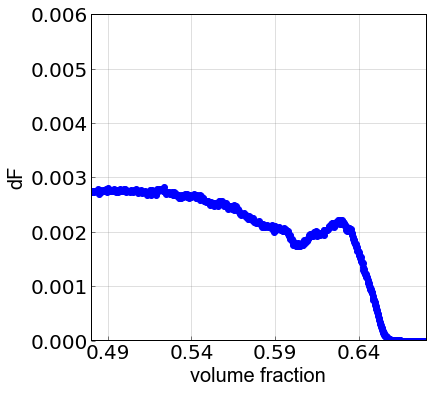

In [474]:
#things to plot
#plt.plot(etas, df, c="b", linestyle = '-', linewidth = 1, marker='o')
#plt.plot(etas, df_s, c="r", linestyle = '-', linewidth = 1, marker='o')
#plt.plot(etas, df_pred, c="r", linestyle = '-', linewidth = 3)#, marker='o')
#plt.plot(etas_2, 2.0*hist_2, c="g", linestyle = '-', linewidth = 1, marker='o')

plt.plot(etas, hist, c="b", linestyle = '-', linewidth = 1, marker='o')
#plt.plot(etas, hist_s, c="r", linestyle = '-', linewidth = 1, marker='o')

#backround grid details
axes = plt.gca()
axes.grid(b = True, which = 'both', axis = 'both', color = 'gray', linestyle = '-', alpha = 0.5, linewidth = 0.5) 
axes.set_axis_bgcolor('white')  

#font scpecifications
title_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'heavy','size': 20}
axis_label_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'normal','size': 20}

major_ticks = arange(0.49, 0.65, 0.05)  
axes.set_xticks(major_ticks)                                                       

#figure size and tick style
plt.rcParams["figure.figsize"] = [6,6]
plt.rc('axes',edgecolor='black',linewidth=1)
plt.tick_params(which='both', axis='both', color='black', length=4, width=0.5)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#axis range and labels (also specify if log or not)
plt.xlim(0.48, 0.68)
#plt.ylim(0.035, 0.10)
plt.ylim(5, 13)
plt.ylim(0.0, 0.04)
plt.ylim(0.000005, 0.006)

#plt.yscale('log')
plt.xlabel(r'volume fraction', y=3, fontsize=20, fontdict = axis_label_font)
plt.ylabel(r'dF', fontsize=20, fontdict = axis_label_font)

#title and axis labels
plt.tick_params(axis='both', labelsize=20)
#plt.title('Logistic Regression Fit', y=1.05, fontdict = title_font)

plt.show()

In [367]:
max(trajectory)

0.6610354452496926

C:\Users\rbj428\AppData\Local\Continuum\Anaconda2_3\lib\site-packages\ipykernel\__main__.py:13: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


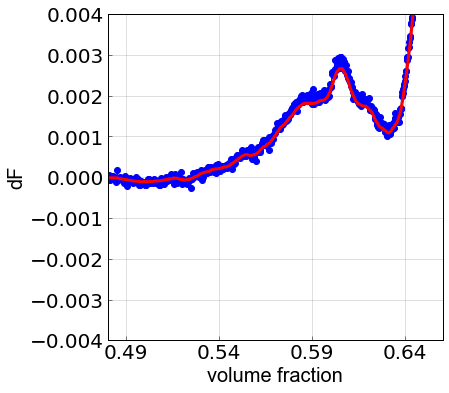

In [657]:
#things to plot
plt.plot(etas, df, c="b", linestyle = '-', linewidth = 1, marker='o')
plt.plot(etas, df_s, c="r", linestyle = '-', linewidth = 3)#, marker='o')
#plt.plot(etas, df_pred, c="r", linestyle = '-', linewidth = 3)#, marker='o')
#plt.plot(etas_2, 2.0*hist_2, c="g", linestyle = '-', linewidth = 1, marker='o')

#plt.plot(etas, hist, c="b", linestyle = '-', linewidth = 1, marker='o')
#plt.plot(etas, hist_s, c="r", linestyle = '-', linewidth = 3)#, marker='o')

#backround grid details
axes = plt.gca()
axes.grid(b = True, which = 'both', axis = 'both', color = 'gray', linestyle = '-', alpha = 0.5, linewidth = 0.5) 
axes.set_axis_bgcolor('white')  

#font scpecifications
title_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'heavy','size': 20}
axis_label_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'normal','size': 20}

major_ticks = arange(0.49, 0.65, 0.05)  
axes.set_xticks(major_ticks)                                                       

#figure size and tick style
plt.rcParams["figure.figsize"] = [6,6]
plt.rc('axes',edgecolor='black',linewidth=1)
plt.tick_params(which='both', axis='both', color='black', length=4, width=0.5)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#axis range and labels (also specify if log or not)
plt.xlim(0.48, 0.66)
#plt.ylim(0.035, 0.10)
plt.ylim(5, 13)
plt.ylim(0.0, 0.00)
plt.ylim(-0.004, 0.004)

#plt.yscale('log')
plt.xlabel(r'volume fraction', y=3, fontsize=20, fontdict = axis_label_font)
plt.ylabel(r'dF', fontsize=20, fontdict = axis_label_font)

#title and axis labels
plt.tick_params(axis='both', labelsize=20)
#plt.title('Logistic Regression Fit', y=1.05, fontdict = title_font)

plt.show()

C:\Users\rbj428\AppData\Local\Continuum\Anaconda2_3\lib\site-packages\ipykernel\__main__.py:13: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


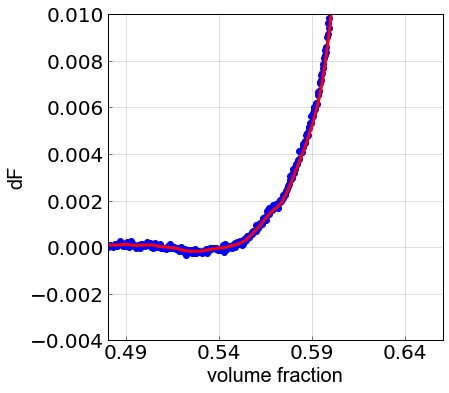

In [664]:
#things to plot
plt.plot(etas, df, c="b", linestyle = '-', linewidth = 1, marker='o')
plt.plot(etas, df_s, c="r", linestyle = '-', linewidth = 3)#, marker='o')
#plt.plot(etas, df_pred, c="r", linestyle = '-', linewidth = 3)#, marker='o')
#plt.plot(etas_2, 2.0*hist_2, c="g", linestyle = '-', linewidth = 1, marker='o')

#plt.plot(etas, hist, c="b", linestyle = '-', linewidth = 1, marker='o')
#plt.plot(etas, hist_s, c="r", linestyle = '-', linewidth = 3)#, marker='o')

#backround grid details
axes = plt.gca()
axes.grid(b = True, which = 'both', axis = 'both', color = 'gray', linestyle = '-', alpha = 0.5, linewidth = 0.5) 
axes.set_axis_bgcolor('white')  

#font scpecifications
title_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'heavy','size': 20}
axis_label_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'normal','size': 20}

major_ticks = arange(0.39, 0.65, 0.05)  
axes.set_xticks(major_ticks)                                                       

#figure size and tick style
plt.rcParams["figure.figsize"] = [6,6]
plt.rc('axes',edgecolor='black',linewidth=1)
plt.tick_params(which='both', axis='both', color='black', length=4, width=0.5)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#axis range and labels (also specify if log or not)
plt.xlim(0.48, 0.66)
#plt.ylim(0.035, 0.10)
plt.ylim(5, 13)
plt.ylim(-0.0, 0.00)
plt.ylim(-0.004, 0.01)

#plt.yscale('log')
plt.xlabel(r'volume fraction', y=3, fontsize=20, fontdict = axis_label_font)
plt.ylabel(r'dF', fontsize=20, fontdict = axis_label_font)

#title and axis labels
plt.tick_params(axis='both', labelsize=20)
#plt.title('Logistic Regression Fit', y=1.05, fontdict = title_font)

plt.show()

C:\Users\rbj428\AppData\Local\Continuum\Anaconda2_3\lib\site-packages\ipykernel\__main__.py:13: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


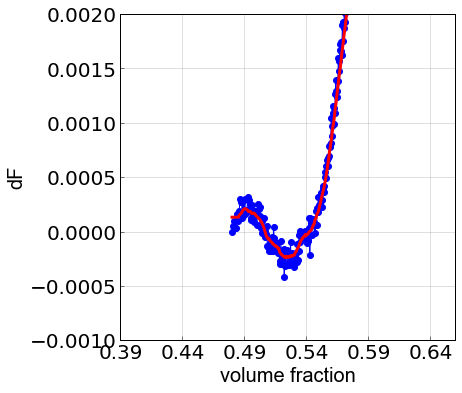

In [648]:
#things to plot
plt.plot(etas, df, c="b", linestyle = '-', linewidth = 1, marker='o')
plt.plot(etas, df_s, c="r", linestyle = '-', linewidth = 3)#, marker='o')
#plt.plot(etas, df_pred, c="r", linestyle = '-', linewidth = 3)#, marker='o')
#plt.plot(etas_2, 2.0*hist_2, c="g", linestyle = '-', linewidth = 1, marker='o')

#plt.plot(etas, hist, c="b", linestyle = '-', linewidth = 1, marker='o')
#plt.plot(etas, hist_s, c="r", linestyle = '-', linewidth = 3)#, marker='o')

#backround grid details
axes = plt.gca()
axes.grid(b = True, which = 'both', axis = 'both', color = 'gray', linestyle = '-', alpha = 0.5, linewidth = 0.5) 
axes.set_axis_bgcolor('white')  

#font scpecifications
title_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'heavy','size': 20}
axis_label_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'normal','size': 20}

major_ticks = arange(0.39, 0.65, 0.05)  
axes.set_xticks(major_ticks)                                                       

#figure size and tick style
plt.rcParams["figure.figsize"] = [6,6]
plt.rc('axes',edgecolor='black',linewidth=1)
plt.tick_params(which='both', axis='both', color='black', length=4, width=0.5)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#axis range and labels (also specify if log or not)
plt.xlim(0.39, 0.66)
#plt.ylim(0.035, 0.10)
plt.ylim(5, 13)
plt.ylim(-0.0, 0.00)
plt.ylim(-0.001, 0.002)

#plt.yscale('log')
plt.xlabel(r'volume fraction', y=3, fontsize=20, fontdict = axis_label_font)
plt.ylabel(r'dF', fontsize=20, fontdict = axis_label_font)

#title and axis labels
plt.tick_params(axis='both', labelsize=20)
#plt.title('Logistic Regression Fit', y=1.05, fontdict = title_font)

plt.show()

In [598]:
max(trajectory)

0.61320772631561826

In [375]:
nums = [1,2,3,3,3,3,4,4,5,2,2,3,2,2,2,2,3,4,4,4,4,5,5,6,6,7]

In [380]:
num_count = {}

In [381]:
for num in nums:
    if num in num_count:
        num_count[num] = num_count[num] + 1
    else:
        num_count[num] = 1

In [382]:
num_count

{1: 1, 2: 7, 3: 6, 4: 6, 5: 3, 6: 2, 7: 1}

In [385]:
set(num_count.keys())

{1, 2, 3, 4, 5, 6, 7}

In [486]:
max(trajectory)

0.66488325458116027

### Monodisperse hard spheres

In [599]:
N = 128
ds = array([1.0])
n = len(ds)
s1 = sum(ds)/n
s2 = sum(ds**2.0)/n
s3 = sum(ds**3.0)/n

In [600]:
desired_acceptance = 0.20
eta_current = 0.38
etas = [eta_current]
accuracy = []
while eta_current < 0.65:
    func = lambda eta_0: ProbCS(eta_current, eta_0, s1, s2, s3, N) - desired_acceptance
    eta_new = newton_krylov(func, eta_current, method='lgmres')
    accuracy.append(eta_new-eta_current)
    if abs(ProbCS(eta_current, eta_new, s1, s2, s3, N) - desired_acceptance) < 0.0000001:
        etas.append(float(eta_new))
        eta_current = float(eta_new)
    else:
        raise ValueError('Solver did not find sufficient solution for neighboring volume fractions')
etas = array(etas)
num_etas = len(etas)

In [601]:
len(etas)

642

In [519]:
etas_file = open('extended_states_mono.txt', 'w')
etas_file.write(('acceptance = %f\n' % desired_acceptance))
etas_string = 'etas = (%s' % etas[0]
for eta in etas[1:]:
    etas_string = etas_string + ',' + str(eta)
etas_string = etas_string + ')'
etas_file.write(etas_string)
etas_file.close()

In [520]:
etas[-1]

0.65015037078412941

In [592]:
len(etas)

605

C:\Users\rbj428\AppData\Local\Continuum\Anaconda2_3\lib\site-packages\ipykernel\__main__.py:13: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


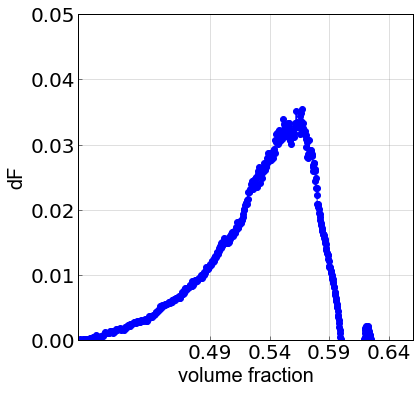

In [624]:
#things to plot
plt.plot(etas, df, c="b", linestyle = '-', linewidth = 1, marker='o')
#plt.plot(etas, df_s, c="r", linestyle = '-', linewidth = 3)#, marker='o')
#plt.plot(etas, df_pred, c="r", linestyle = '-', linewidth = 3)#, marker='o')
#plt.plot(etas_2, 2.0*hist_2, c="g", linestyle = '-', linewidth = 1, marker='o')

#plt.plot(etas, hist, c="b", linestyle = '-', linewidth = 1, marker='o')
#plt.plot(etas, hist_s, c="r", linestyle = '-', linewidth = 3)#, marker='o')

#backround grid details
axes = plt.gca()
axes.grid(b = True, which = 'both', axis = 'both', color = 'gray', linestyle = '-', alpha = 0.5, linewidth = 0.5) 
axes.set_axis_bgcolor('white')  

#font scpecifications
title_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'heavy','size': 20}
axis_label_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'normal','size': 20}

major_ticks = arange(0.49, 0.65, 0.05)  
axes.set_xticks(major_ticks)                                                       

#figure size and tick style
plt.rcParams["figure.figsize"] = [6,6]
plt.rc('axes',edgecolor='black',linewidth=1)
plt.tick_params(which='both', axis='both', color='black', length=4, width=0.5)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#axis range and labels (also specify if log or not)
plt.xlim(0.38, 0.66)
#plt.ylim(0.035, 0.10)
plt.ylim(5, 13)
plt.ylim(0.0, 0.00)
plt.ylim(0.000001, 0.05)

#plt.yscale('log')
plt.xlabel(r'volume fraction', y=3, fontsize=20, fontdict = axis_label_font)
plt.ylabel(r'dF', fontsize=20, fontdict = axis_label_font)

#title and axis labels
plt.tick_params(axis='both', labelsize=20)
#plt.title('Logistic Regression Fit', y=1.05, fontdict = title_font)

plt.show()

In [1065]:
#hist = 0.0*etas
trajectory_raw = []

filename = 'C:/Users/rbj428/Documents/research_projects/binary_hs_sim/production__eta_stats.dat'
eta_stats = open(filename, 'r')
for line in eta_stats:  
    try:
        search_data = re.search(r'[^,]+,([0-9]+),([0-9\.]+),[^,]+', line)
        #bin_num = int(search_data.group(1))
            
        #hist[bin_num] = hist[bin_num] + 1
        #trajectory.append(etas[bin_num])
        trajectory_raw.append(float(search_data.group(2)))
    except:
        print line
        break
#hist_s = Smoother(hist, half_window = 6)
#hist_s = hist_s/sum(hist_s)
#hist = hist/sum(hist)
eta_stats.close()

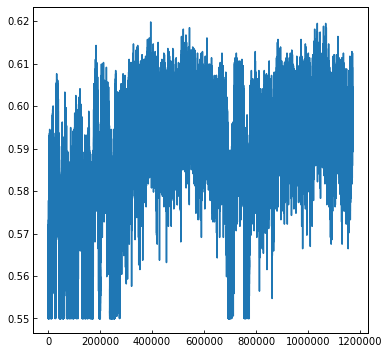

In [1066]:
plt.plot(trajectory_raw)

In [1910]:
def CS(eta):
    return -(4.0*eta - 3.0*eta**2.0)/(1.0 - eta)**2.0

In [1912]:
CS(0.55)

-6.382716049382717

In [1913]:
S(0.55, s1, s2, s3)

-6.3827160493827177

In [1281]:
from numpy import pi

In [2004]:
#ds = array([1.0, 1.4])
ds = array(ds)
n = len(ds)
s1 = sum(ds)/n
s2 = sum(ds**2.0)/n
s3 = sum(ds**3.0)/n

In [1984]:
def S(eta, s1, s2, s3):
    e0 = eta/s3
    e1 = eta*s1/s3
    e2 = eta*s2/s3
    e3 = eta*s3/s3
    F = ((e2**3.0)/(e0*e3**2.0) - 1.0)*log(1.0 - e3) + (3.0*e1*e2)/(e0*(1.0 - e3)) + (e2**3.0)/(e0*e3*(1.0 - e3)**2.0)
    F = F #+ QuadFit(eta, 0.9605024, -0.5656655, 0.05024441) #+ ExpFit(eta, 8.44025263e-16, 5.26800174e+01)
    return -F

In [1985]:
def Z(eta, s1, s2, s3):
    return (-eta*(S(eta+0.001, s1, s2, s3) - S(eta-0.001, s1, s2, s3))/(0.002))

In [1880]:
def Y(eta, s1, s2, s3):
    return (Z(eta, s1, s2, s3)-1.0)/(4.0*eta)

In [1881]:
def E(eta, s1, s2, s3):
    p = 6.0*eta/(pi*s3)
    return S(eta, s1, s2, s3) + 1.0 - log(p) - 3.0*log(sqrt(2.0*pi)/(8.0*0.638*eta*Y(eta, s1, s2, s3)))

In [1940]:
def A(eta, s1, s2, s3):
    return (s1/(8.0*0.638*eta*Y(eta, s1, s2, s3)))**2.0

In [1883]:
def Lind(eta, s1, s2, s3):
    p = 6.0*eta/(pi*s3)
    return (p**(1.0/3.0))*sqrt(A(eta, s1, s2, s3))

In [1907]:
Y(0.55, s1, s2, s3)

7.5016251838609138

In [1986]:
S(0.6, s1, s2, s3)

-7.3956773345473241

In [1937]:
Y(0.55, s1, s2, s3)

7.5016251838609138

In [1376]:
E(0.67490, s1, s2, s3)

4.0932784655112187e-05

In [1954]:
Lind(0.58, s1, s2, s3)

0.038189410087811008

In [1983]:
Z(0.55, s1, s2, s3)

15.521661759773941

In [1953]:
sqrt(A(0.58, s1, s2, s3))

0.036909074849874449

In [1949]:
sqrt(A(0.55, s1, s2, s3))

0.047486622768283478

In [1971]:
Z(0.55, s1, s2, s3)

15.515765387725633

In [1997]:
Zs = []
for x in arange(0.55, 0.68, 0.01):
    Zs.append(Z(x, s1, s2, s3))

In [1998]:
Zs

[14.29562316849864,
 15.441988307211789,
 16.700002003780305,
 18.083363660622915,
 19.607830687960764,
 21.29158781243952,
 23.155694059309671,
 25.224626275751142,
 27.526943295411137,
 30.096101718117442,
 32.97146337240298,
 36.199546647120727,
 39.835590154334128]

In [1994]:
E(0.673, s1, s2, s3)

0.073134538014308248

In [1445]:
Lind(0.579, s1, s2, s3)

0.097710890188947727

In [1434]:
Lind(0.6, s1, s2, s3)

0.097437625565161515

In [1448]:
ds

array([ 1. ,  1.4])

In [1345]:
sum(ds*ds*ds)/len(ds)

3.0543736358472757

In [1367]:
s3

3.0543736358472757

In [1455]:
S(0.6, s1, s2, s3)

-7.8519279969318143

In [1453]:
S(0.6, s1, s2, s3)

-7.8068940549506873

In [1465]:
Y(0.6, s1, s2, s3)

10.45205486029872

In [1553]:
E(0.65, s1, s2, s3)

-0.024204911944242014

In [1503]:
E(0.68, s1, s2, s3)

-0.76700574741599503

In [1514]:
E(0.674, s1, s2, s3)

0.034910257301966396

In [1525]:
E(0.674, s1, s2, s3)

-0.037311929588252468

In [1623]:
Lind(0.57, s1, s2, s3)

0.097179529832384259

In [1631]:
E(0.675, s1, s2, s3)

-0.0038028209563325532

In [1599]:
Lind(0.575, s1, s2, s3)

0.09854093681056901

In [1857]:
E(0.649, s1, s2, s3)

0.0074432272227920038

In [1858]:
A(0.649, s1, s2, s3)

0.0040320934095575793

In [1604]:
max(ds)

1.6590393542994994

In [1644]:
E(0.675, s1, s2, s3)

-0.0052111730400756784

In [1851]:
E(0.697, s1, s2, s3)

0.041617036448514

In [1919]:
A(0.55, s1, s2, s3)

0.02029481407743533

In [1917]:
E(0.6, s1, s2, s3)

0.27468287865650165

In [2005]:
desired_acceptance = 0.10
eta_current = 0.62 #0.55
etas = [eta_current]
while eta_current < 0.85:
    func = lambda eta_0: ProbCS(eta_current, eta_0, s1, s2, s3, N) - desired_acceptance
    eta_new = newton_krylov(func, eta_current, method='lgmres')
    if abs(ProbCS(eta_current, eta_new, s1, s2, s3, N) - desired_acceptance) < 0.000001:
        etas.append(float(eta_new))
        eta_current = float(eta_new)
    else:
        raise ValueError('Solver did not find sufficient solution for neighboring volume fractions')
etas = array(etas)
num_etas = len(etas)

In [1840]:
print etas

[ 0.62        0.62038874  0.62077641 ...,  0.84996706  0.84999616
  0.85002525]


In [2031]:
dr_maxs = array([sqrt(1.6*A(x, s1, s2, s3)) for x in etas])

In [2032]:
dr_maxs

array([ 0.06048803,  0.06024805,  0.06000959, ...,  0.00323879,
        0.00323659,  0.00323438])

In [2033]:
#generate etas
etas_file = open('extended_states_small_cage_fit.txt', 'w')
etas_file.write(('acceptance = %f\n' % desired_acceptance))
etas_string = 'etas = (%s' % etas[0]
for eta in etas[1:]:
    etas_string = etas_string + ',' + str(eta)
etas_string = etas_string + ')\n'
etas_file.write(etas_string)



#generate dr_max values
dr_maxs_string = 'dr_maxs = (%s' % dr_maxs[0]
for dr_max in dr_maxs[1:]:
    dr_maxs_string = dr_maxs_string + ',' + str(dr_max)
dr_maxs_string = dr_maxs_string + ')'
etas_file.write(dr_maxs_string)

etas_file.close()